In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
books = pd.read_csv('./data/books_final.csv')
author = pd.read_csv('./data/author_final.csv', index_col=0)

In [44]:
def nulls(df: pd.DataFrame):
    return pd.DataFrame({
        'cols': df.columns,
        "null_count": df.isna().sum().values,
        '% null': np.round(df.isna().sum().values / len(df) * 100, 3)
    }).sort_values(by='null_count', ascending=False).reset_index(drop=True)

In [43]:
books.head(5)

,作品ID,作品名,人物ID,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名
1,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名
2,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名
3,60225,寡婦とその子,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,7042.0,年老いた人をいたわりなさい。その銀髪は、名誉と尊敬をつねに集めてきたのです。――マーロウ作「...,NDC 933,新字新仮名
4,60231,クリスマス,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,4953.0,だが、あのなつかしい、思い出ふかいクリスマスのお爺さんはもう逝ってしまったのだろうか。あとに...,NDC 933,新字新仮名


getting birthYear

In [10]:
author.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 0 to 1184
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1185 non-null   int64 
 1   author      1185 non-null   object
 2   birthDate   1131 non-null   object
 3   deathDate   1097 non-null   object
 4   gender      1175 non-null   object
 5   birthPlace  992 non-null    object
 6   last        1185 non-null   object
 7   first       1154 non-null   object
dtypes: int64(1), object(7)
memory usage: 83.3+ KB


In [24]:
def get_year(row):
    if pd.isnull(row):
        return None
    
    if '-' in row:
        return row[0: row.index('-', 1)] # starting at 1 as there are a few BC years that are represented as -[year]
    else: # only year is known
        return row

author['birthYear'] = author['birthDate'].apply(get_year)

In [27]:
np.unique_values(author['birthYear'].astype(str))

array(['-0427', '0700', '0973', '1008', '1048', '1153', '1265', '1283',
       '1341', '1452', '1483', '1533', '1546', '1596', '1608', '1628',
       '1640', '1642', '1659', '1667', '1694', '1695', '1711', '1734',
       '1735', '1743', '1748', '1749', '1757', '1761', '1765', '1766',
       '1769', '1770', '1771', '1772', '1776', '1783', '1785', '1786',
       '1796', '1797', '1799', '1801', '1802', '1803', '1804', '1805',
       '1807', '1809', '1810', '1811', '1812', '1813', '1814', '1816',
       '1817', '1818', '1820', '1821', '1823', '1824', '1826', '1828',
       '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836',
       '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
       '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869',
       '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877',
     

In [68]:
def get_author_age(row):
    print(row)
    if pd.isna(row['inception']) or pd.isna(author.loc[author['id'] == row['人物ID'], 'birthYear']).values[0]:
        return np.nan
    
    print(row)
    
    author_birth = float(author[author['id'] == row['人物ID']]['birthYear'])
    year_pub = float(row['inception'])

    age_at_publish = year_pub - author_birth
    return age_at_publish



In [64]:
nulls(books)

,cols,null_count,% null
0,inception,6807,38.948
1,分類番号,572,3.273
2,作品ID,0,0.000
3,人物ID,0,0.000
4,作品名,0,0.000
5,XHTML/HTMLファイルURL,0,0.000
6,char_count,0,0.000
7,text,0,0.000
8,文字遣い種別,0,0.000


In [69]:
books['authorAge'] = books[['inception', '人物ID']].apply(get_author_age, axis=1)

inception     NaN
人物ID         1257
Name: 0, dtype: object
inception     NaN
人物ID         1257
Name: 1, dtype: object
inception     NaN
人物ID         1257
Name: 2, dtype: object
inception     NaN
人物ID         1257
Name: 3, dtype: object
inception     NaN
人物ID         1257
Name: 4, dtype: object
inception     NaN
人物ID         1257
Name: 5, dtype: object
inception     NaN
人物ID         1257
Name: 6, dtype: object
inception     NaN
人物ID         1257
Name: 7, dtype: object
inception     NaN
人物ID         1257
Name: 8, dtype: object
inception    1889
人物ID         1257
Name: 9, dtype: object
inception    1889
人物ID         1257
Name: 9, dtype: object
inception     NaN
人物ID         1257
Name: 10, dtype: object
inception     NaN
人物ID         1257
Name: 11, dtype: object
inception     NaN
人物ID         1257
Name: 12, dtype: object
inception     NaN
人物ID         1257
Name: 13, dtype: object
inception     NaN
人物ID         1257
Name: 14, dtype: object
inception     NaN
人物ID         1257
Name: 15, dtype

C:\Users\Jaden\AppData\Local\Temp\ipykernel_11140\1136919165.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  author_birth = float(author[author['id'] == row['人物ID']]['birthYear'])


inception    NaN
人物ID         879
Name: 142, dtype: object
inception    1925
人物ID          879
Name: 143, dtype: object
inception    1925
人物ID          879
Name: 143, dtype: object
inception    NaN
人物ID         879
Name: 144, dtype: object
inception    NaN
人物ID         879
Name: 145, dtype: object
inception    1919
人物ID          879
Name: 146, dtype: object
inception    1919
人物ID          879
Name: 146, dtype: object
inception    1919
人物ID          879
Name: 147, dtype: object
inception    1919
人物ID          879
Name: 147, dtype: object
inception    1924
人物ID          879
Name: 148, dtype: object
inception    1924
人物ID          879
Name: 148, dtype: object
inception    NaN
人物ID         879
Name: 149, dtype: object
inception    NaN
人物ID         879
Name: 150, dtype: object
inception    1918
人物ID          879
Name: 151, dtype: object
inception    1918
人物ID          879
Name: 151, dtype: object
inception    NaN
人物ID         879
Name: 152, dtype: object
inception    NaN
人物ID         879
Na

In [80]:
author['deathYear'] = author['deathDate'].apply(get_year)

In [81]:
author.head(5)

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936


In [82]:
books = books.rename({'人物ID': 'id'}, axis=1)

In [90]:
merge = books.merge(author[['id', 'author', 'birthYear', 'deathYear']], how = 'left', on='id')

In [84]:
merge.head()

,作品ID,作品名,id,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別,authorAge,birthYear,deathYear
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,1783,1859
1,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,1783,1859
2,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名,NaN,1783,1859
3,60225,寡婦とその子,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,7042.0,年老いた人をいたわりなさい。その銀髪は、名誉と尊敬をつねに集めてきたのです。――マーロウ作「...,NDC 933,新字新仮名,NaN,1783,1859
4,60231,クリスマス,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,4953.0,だが、あのなつかしい、思い出ふかいクリスマスのお爺さんはもう逝ってしまったのだろうか。あとに...,NDC 933,新字新仮名,NaN,1783,1859


In [91]:
impossible = merge['inception'] > merge['deathYear']

In [88]:
impossible.sum()

np.int64(243)

In [94]:
merge[impossible].head(10) 

,作品ID,作品名,id,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別,authorAge,author,birthYear,deathYear
9,60357,新浦島,1257,https://www.aozora.gr.jp/cards/001257/files/60...,1889,13988.0,「サクソンの畏き神に縁みてぞ、けふをば『ヱンスデイ』といふ。その神見ませ、よるよりも暗くさび...,NDC K933,新字旧仮名,106.0,アーヴィングワシントン,1783,1859
403,181,槍が岳に登った記,879,https://www.aozora.gr.jp/cards/000879/files/18...,1929,2538.0,赤沢雑木の暗い林を出ると案内者がここが赤沢ですと言った。暑さと疲れとで目のくらみかかった自分...,NDC 915,新字新仮名,37.0,芥川竜之介,1892,1927
457,55243,「黒瞳」より,1716,https://www.aozora.gr.jp/cards/001716/files/55...,1901,173.0,おくつきに跪きわが父の墳塋にとこしへの愛をわれにちかひぬ。汝もし操なくば一日たてし誓に願くば...,NDC 961,旧字旧仮名,68.0,アラルコンペドロ・アントニオ,1833,1891
491,4994,燕と王子,25,https://www.aozora.gr.jp/cards/000025/files/49...,1926,9293.0,燕という鳥は所をさだめず飛びまわる鳥で、暖かい所を見つけておひっこしをいたします。今は日本が...,NDC K913,新字新仮名,48.0,有島武郎,1878,1923
540,45183,一本足の兵隊,19,https://www.aozora.gr.jp/cards/000019/files/45...,1919,5351.0,一或小さなお坊ちやんが、お誕生日のお祝ひに、箱入りのおもちやをもらひました。坊ちやんは、さつ...,NDC K913,新字旧仮名,114.0,アンデルセンハンス・クリスチャン,1805,1875
694,48155,所謂今度の事,153,https://www.aozora.gr.jp/cards/000153/files/48...,1957,5835.0,（一）二三日前の事である。途で渇を覺えてとあるビイヤホオルに入ると、窓側の小さい卓を圍んで語...,NDC 914,旧字旧仮名,71.0,石川啄木,1886,1912
704,45462,雲は天才である,153,https://www.aozora.gr.jp/cards/000153/files/45...,1919,16054.0,一六月三十日、Ｓ――村尋常高等小学校の職員室では、今しも壁の掛時計が平常の如く極めて活気のな...,NDC 913,新字旧仮名,33.0,石川啄木,1886,1912
748,45470,二筋の血,153,https://www.aozora.gr.jp/cards/000153/files/45...,1919,11839.0,夢の様な幼少の時の追憶、喜びも悲みも罪のない事許り、それからそれと朧気に続いて、今になつては...,NDC 913,新字旧仮名,33.0,石川啄木,1886,1912
1116,56233,内気な娘とお転婆娘,416,https://www.aozora.gr.jp/cards/000416/files/56...,1925,6966.0,『女はしとやかでなくてはいけない、をとなしくなくてはいけない』と云ふ訓しへは甚だ結構な事です...,NDC 914,新字旧仮名,30.0,伊藤野枝,1895,1923
1340,60609,雨月物語,1271,https://www.aozora.gr.jp/cards/001271/files/60...,1959,185413.0,凡例一本書は、安永五年（一七七六）刊、野梅堂版（京都梅村判兵衛・大坂野村長兵衛の合板）の初版...,NaN,新字新仮名,225.0,上田秋成,1734,1809


On close inspection, some of the works are actually released after the author's death, which makes it a bit ambiguous.

- one one hand, I think it still serves as a good representative of the 'times', 'era', and 'life' of the author... it feels like a waste to remove this, as there are many that are really soldi works.
- on the other hand, I think this can introduce noise to the algorithm, as we do not know exactly when this was written -- beyond the fact that it was released after their death.

In [104]:
author_role = pd.read_csv('./data/list_person_all_extended_utf8.csv', usecols=['作品ID', '役割フラグ'])

In [105]:
books_merged = books.merge(author_role, how='left', on='作品ID' )

<Axes: xlabel='count', ylabel='役割フラグ'>

d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33879 (\N{CJK UNIFIED IDEOGRAPH-8457}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32763 (\N{CJK UNIFIED IDEOGRAPH-7FFB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 35379 (\N{CJK UNIFIED IDEOGRAPH-8A33}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32232 (\N{CJK UNIFIED IDEOGRAPH-7DE8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\PythonDevelopment\jap_lit\e

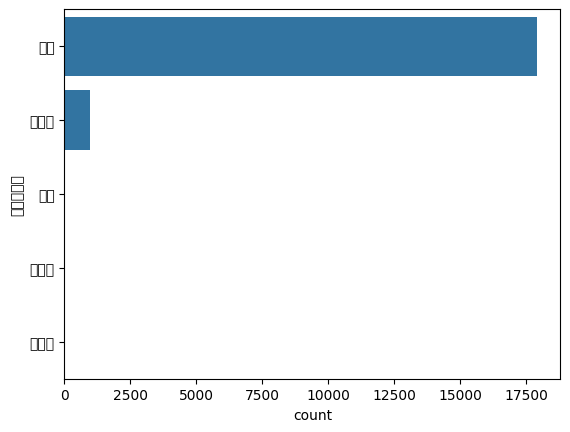

In [106]:
sns.countplot(books_merged['役割フラグ'])

In [135]:
merge = books_merged.merge(author[['id', 'author', 'birthYear', 'deathYear']], how = 'left', on='id')

In [114]:
impossible = (merge['inception'] > merge['deathYear']) & (merge['役割フラグ'] == '翻訳者')

In [118]:
len(merge[impossible])

24

In [123]:
idx = merge[impossible].index

idx

Index([   19,    20,   500,  1554,  1627,  1638,  4635,  6579,  6583,  8398,
        8399,  8942, 10605, 11108, 11110, 11111, 11588, 11589, 14617, 14618,
       14620, 14621, 14623, 14624],
      dtype='int64')

In [121]:
merge.loc[idx]['authorAge'].describe()

count     24.000000
mean     151.125000
std      179.790533
min       46.000000
25%       85.000000
50%      103.000000
75%      116.250000
max      784.000000
Name: authorAge, dtype: float64

In [136]:
merge = merge.drop(index=idx)

In [128]:
nulls(merge)

,cols,null_count,% null
0,authorAge,7869,41.646
1,inception,7721,40.863
2,分類番号,673,3.562
3,deathYear,368,1.948
4,birthYear,248,1.313
5,作品ID,0,0.000
6,char_count,0,0.000
7,XHTML/HTMLファイルURL,0,0.000
8,id,0,0.000
9,作品名,0,0.000


In [129]:
merge = merge.drop(columns=['deathYear', 'birthYear', 'author'])

In [130]:
merge.head(5)

,作品ID,作品名,id,XHTML/HTMLファイルURL,inception,char_count,text,分類番号,文字遣い種別,authorAge,役割フラグ
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,著者
1,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,翻訳者
2,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,著者
3,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,翻訳者
4,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名,NaN,著者


In [151]:
merge = merge.rename(columns={'作品ID': 'id', '作品名': 'title', 'id': 'author_id', 'XHTML/HTMLファイルURL': 'url', '分類番号': 'category', '文字遣い種別': 'char_type', '役割フラグ': 'author_role'  })

In [133]:
merge.to_csv('./data/books_final.csv', header=True, index=False, encoding='utf-8')

### Seeing if I can do any null imputation.

1. authorAge / birthYear

In [144]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18895 entries, 0 to 18918
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   作品ID               18895 non-null  int64  
 1   作品名                18895 non-null  object 
 2   id                 18895 non-null  int64  
 3   XHTML/HTMLファイルURL  18895 non-null  object 
 4   inception          11174 non-null  object 
 5   char_count         18895 non-null  float64
 6   text               18895 non-null  object 
 7   分類番号               18222 non-null  object 
 8   文字遣い種別             18895 non-null  object 
 9   authorAge          11026 non-null  float64
 10  役割フラグ              18895 non-null  object 
 11  author             18895 non-null  object 
 12  birthYear          18647 non-null  object 
 13  deathYear          18527 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 2.2+ MB


In [147]:
merge['birthYear'] = merge['birthYear'].astype(float)
merge['deathYear'] = merge['deathYear'].astype(float)

In [148]:
#### Seeing if there is correlation b/w author age and time period that author is alive.

merge.corr(numeric_only=True)

,作品ID,id,char_count,authorAge,birthYear,deathYear
作品ID,1.000000,0.525412,-0.033193,0.120407,0.092434,0.129696
id,0.525412,1.000000,0.047732,0.185189,0.088554,0.160874
char_count,-0.033193,0.047732,1.000000,0.048331,-0.032227,-0.033619
authorAge,0.120407,0.185189,0.048331,1.000000,-0.542208,-0.123908
birthYear,0.092434,0.088554,-0.032227,-0.542208,1.000000,0.975991
deathYear,0.129696,0.160874,-0.033619,-0.123908,0.975991,1.000000


`birthYear` is the most correlated with `authorAge`. Due to a negative r, we might be able to interpret that a more modern era leads to younger and younger authors.

To confirm this, I will find the age of each author when they wrote their first work. This will lead to less autocorrelation.

In [149]:
author

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936
...,...,...,...,...,...,...,...,...,...,...
1180,1515,山本政喜,1899-04-20,1960-04-07,male,Japan,山本,政喜,1899,1960
1181,1858,山本和久三,1893,1932,male,Japan,山本,和久三,1893,1932
1182,2157,吉岡信敬,1885-09-01,1940-12-07,male,Japan,吉岡,信敬,1885,1940
1183,2245,和田信賢,1912-06-19,1952-08-14,male,Japan,和田,信賢,1912,1952


In [152]:
merge

,id,title,author_id,url,inception,char_count,text,category,char_type,authorAge,author_role,author,birthYear,deathYear
0,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,著者,アーヴィングワシントン,1783.0,1859.0
1,59898,ウェストミンスター寺院,1257,https://www.aozora.gr.jp/cards/001257/files/59...,NaN,10562.0,深いおどろきにうたれて、名高いウェストミンスターに真鍮や石の記念碑となってすべての王侯貴族が...,NDC 933,新字新仮名,NaN,翻訳者,アーヴィングワシントン,1783.0,1859.0
2,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,著者,アーヴィングワシントン,1783.0,1859.0
3,56078,駅伝馬車,1257,https://www.aozora.gr.jp/cards/001257/files/56...,NaN,6041.0,いざ、これより樂しまむ、仕置を受くる憂なく、遊びたのしむ時ぞ來ぬ、時ぞ來ぬれば、いちはやく、...,NDC 933,旧字旧仮名,NaN,翻訳者,アーヴィングワシントン,1783.0,1859.0
4,60224,駅馬車,1257,https://www.aozora.gr.jp/cards/001257/files/60...,NaN,6216.0,すべてよし。何して遊ぼと叱られない。時はきた。さっさと本など投げだそう。――休日に歌った昔の...,NDC 933,新字新仮名,NaN,著者,アーヴィングワシントン,1783.0,1859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18914,49911,面とペルソナ,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1935,4761.0,問題にしない時にはわかり切ったことと思われているものが、さて問題にしてみると実にわからなくな...,NDC 121,新字新仮名,46.0,著者,和辻哲郎,1889.0,1960.0
18915,55622,夢,1395,https://www.aozora.gr.jp/cards/001395/files/55...,1952,12400.0,夢の話をするのはあまり気のきいたことではない。確か痴人夢を説くという言葉があったはずだ。そう...,NDC 121,新字新仮名,63.0,著者,和辻哲郎,1889.0,1960.0
18916,49876,『劉生画集及芸術観』について,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1921,4655.0,自分は現代の画家中に岸田君ほど明らかな「成長」を示している人を知らない。誇張でなく岸田君は一...,NDC 723 914,新字新仮名,32.0,著者,和辻哲郎,1889.0,1960.0
18917,49913,霊的本能主義,1395,https://www.aozora.gr.jp/cards/001395/files/49...,1907,12075.0,一荒漠たる秋の野に立つ。星は月の御座を囲み月は清らかに地の花を輝らす。花は紅と咲き黄と匂い紫...,NDC 121,新字新仮名,18.0,著者,和辻哲郎,1889.0,1960.0


In [164]:
def get_age_at_first(row):
    # 1. for each author, query all of their works.
    author_works = merge[merge['author_id'] == row]
    # 2. find the earliest inception year.
    earliest = np.min(author_works['inception'].values)

    print(earliest)

In [ ]:
# remove authors with no records in the books dataset.

In [165]:
len(merge['author_id'].unique())

960

In [166]:
author

,id,author,birthDate,deathDate,gender,birthPlace,last,first,birthYear,deathYear
0,148,夏目漱石,1867-02-09,1916-12-09,male,喜久井町,Natsume,Soseki,1867,1916
1,81,宮沢賢治,1896-08-27,1933-09-21,male,花巻川口町,Miyazawa,Kenji,1896,1933
2,35,太宰治,1909-06-19,1948-06-13,male,金木町,Dazai,Osamu,1909,1948
3,119,中島敦,1909-05-05,1942-12-04,male,四谷区,Nakajima,Atsushi,1909,1942
4,96,夢野久作,1889-01-04,1936-03-11,male,福岡市,Yumeno,Kyusaku,1889,1936
...,...,...,...,...,...,...,...,...,...,...
1180,1515,山本政喜,1899-04-20,1960-04-07,male,Japan,山本,政喜,1899,1960
1181,1858,山本和久三,1893,1932,male,Japan,山本,和久三,1893,1932
1182,2157,吉岡信敬,1885-09-01,1940-12-07,male,Japan,吉岡,信敬,1885,1940
1183,2245,和田信賢,1912-06-19,1952-08-14,male,Japan,和田,信賢,1912,1952


In [157]:
author['id'].apply(get_age_at_first)

1916
nan
1918
1923
1915
1948


ValueError: zero-size array to reduction operation minimum which has no identity